<a href="https://colab.research.google.com/github/yuziny/Data-Analysis/blob/main/3_%EA%B5%AC%EB%B3%84_%EB%93%B1%EB%A1%9D%EC%9D%B8%EA%B5%AC_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 서울시 생활정보 기반 대중교통 수요 분석

버스 노선 추가가 필요한 서울시 내 자치구 선정

3. 구 별 등록인구 분석

In [ ]:
!pip install pandas seaborn

데이터
- 3.seoul_people.csv
- 서울시 주민등록 데이터
- 한국인, 등록 외국인, 합계, 세대수, 고령인구수

In [ ]:
import sys
import numpy as np
import pandas as pd

In [ ]:
seoul_people = pd.read_csv('/content/drive/MyDrive/포트폴리오/3. seoul_people.csv', sep='\t', encoding='cp949')
seoul_people.shape

(28, 14)

기본 정보 확인

In [ ]:
seoul_people.describe().T

,count,unique,top,freq
기간,28,2,2022.1/4,26
자치구,28,27,자치구,2
세대,28,27,세대,2
인구,28,28,합계,1
인구.1,28,28,합계,1
인구.2,28,28,합계,1
인구.3,28,28,한국인,1
인구.4,28,28,한국인,1
인구.5,28,28,한국인,1
인구.6,28,28,등록외국인,1


In [ ]:
seoul_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   기간        28 non-null     object
 1   자치구       28 non-null     object
 2   세대        28 non-null     object
 3   인구        28 non-null     object
 4   인구.1      28 non-null     object
 5   인구.2      28 non-null     object
 6   인구.3      28 non-null     object
 7   인구.4      28 non-null     object
 8   인구.5      28 non-null     object
 9   인구.6      28 non-null     object
 10  인구.7      28 non-null     object
 11  인구.8      28 non-null     object
 12  세대당인구     28 non-null     object
 13  65세이상고령자  28 non-null     object
dtypes: object(14)
memory usage: 3.2+ KB


In [ ]:
seoul_people.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2022.1/4,합계,4451444,9732617,4716704,5015913,9506778,4613910,4892868,225839,102794,123045,2.14,1628980
3,2022.1/4,종로구,73766,153684,74018,79666,144275,69911,74364,9409,4107,5302,1.96,28064
4,2022.1/4,중구,63767,131450,63869,67581,122173,59448,62725,9277,4421,4856,1.92,24742


In [ ]:
import pandas as pd
seoul_people = pd.read_csv('/content/drive/MyDrive/포트폴리오/3. seoul_people.csv', sep='\t', encoding='cp949', header=2)
seoul_people

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2022.1/4,합계,4451444,9732617,4716704,5015913,9506778,4613910,4892868,225839,102794,123045,2.14,1628980
1,2022.1/4,종로구,73766,153684,74018,79666,144275,69911,74364,9409,4107,5302,1.96,28064
2,2022.1/4,중구,63767,131450,63869,67581,122173,59448,62725,9277,4421,4856,1.92,24742
3,2022.1/4,용산구,111207,236518,114571,121947,222169,106735,115434,14349,7836,6513,2.00,39461
4,2022.1/4,성동구,134533,291609,141662,149947,285073,138847,146226,6536,2815,3721,2.12,46896
5,2022.1/4,광진구,169483,353110,169525,183585,340707,164346,176361,12403,5179,7224,2.01,52604
6,2022.1/4,동대문구,169695,352592,172318,180274,337982,166823,171159,14610,5495,9115,1.99,62963
7,2022.1/4,중랑구,187693,393600,193623,199977,389043,191835,197208,4557,1788,2769,2.07,72851
8,2022.1/4,성북구,197296,442680,212277,230403,433150,208691,224459,9530,3586,5944,2.20,75719
9,2022.1/4,강북구,144725,300824,145934,154890,297384,144643,152741,3440,1291,2149,2.05,64961


In [ ]:
seoul_people = seoul_people.iloc[:,[1,3,4,5,12,13]]
seoul_people

,자치구,계,남자,여자,세대당인구,65세이상고령자
0,합계,9732617,4716704,5015913,2.14,1628980
1,종로구,153684,74018,79666,1.96,28064
2,중구,131450,63869,67581,1.92,24742
3,용산구,236518,114571,121947,2.00,39461
4,성동구,291609,141662,149947,2.12,46896
5,광진구,353110,169525,183585,2.01,52604
6,동대문구,352592,172318,180274,1.99,62963
7,중랑구,393600,193623,199977,2.07,72851
8,성북구,442680,212277,230403,2.20,75719
9,강북구,300824,145934,154890,2.05,64961


In [ ]:
seoul_people.to_csv('df_seoul_people.csv', index=False)

데이터 분석

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

In [ ]:
import warnings

# 오류 경고 무시하기
warnings.filterwarnings(action='ignore')

In [ ]:
plt.rc('font', family='NanumBarunGothic')

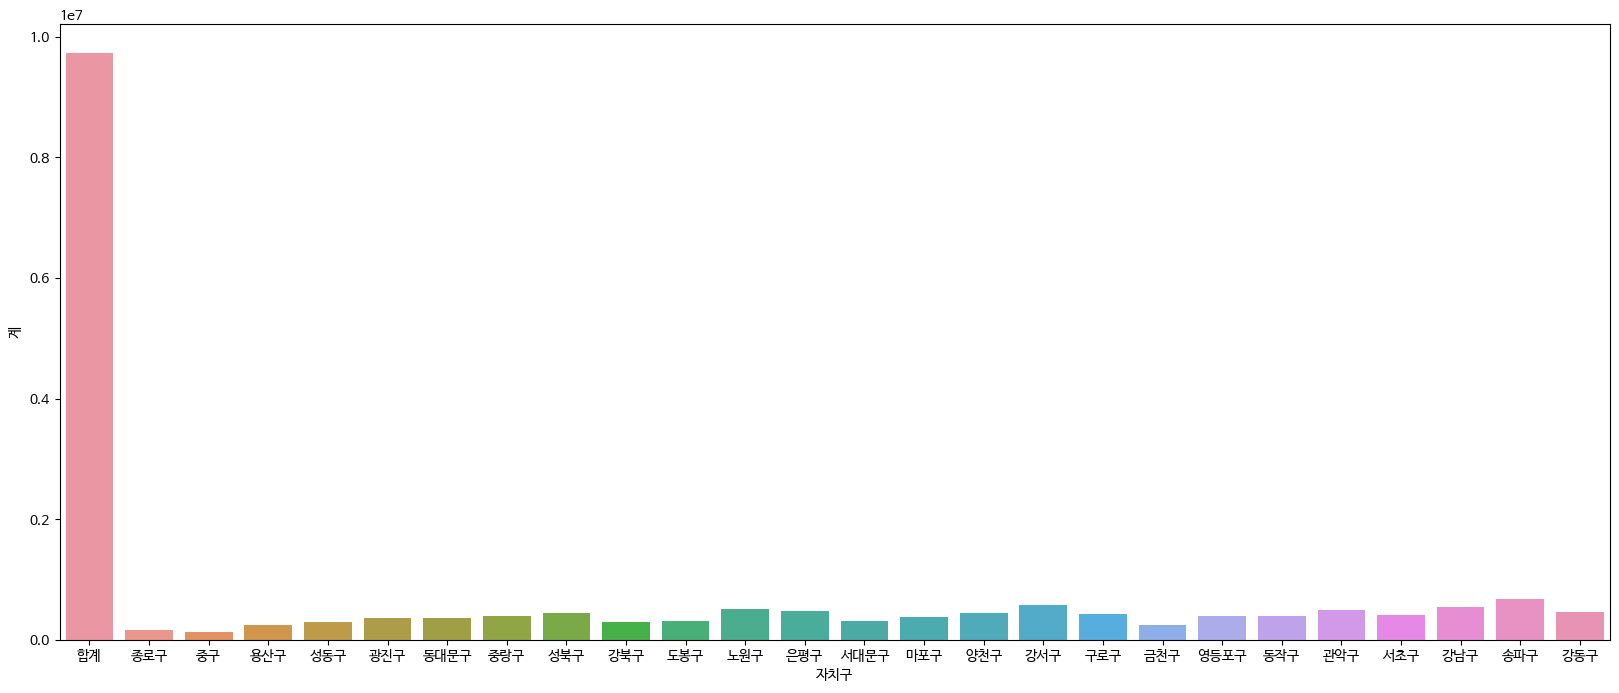

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='자치구', y='계', data=seoul_people)
plt.show()

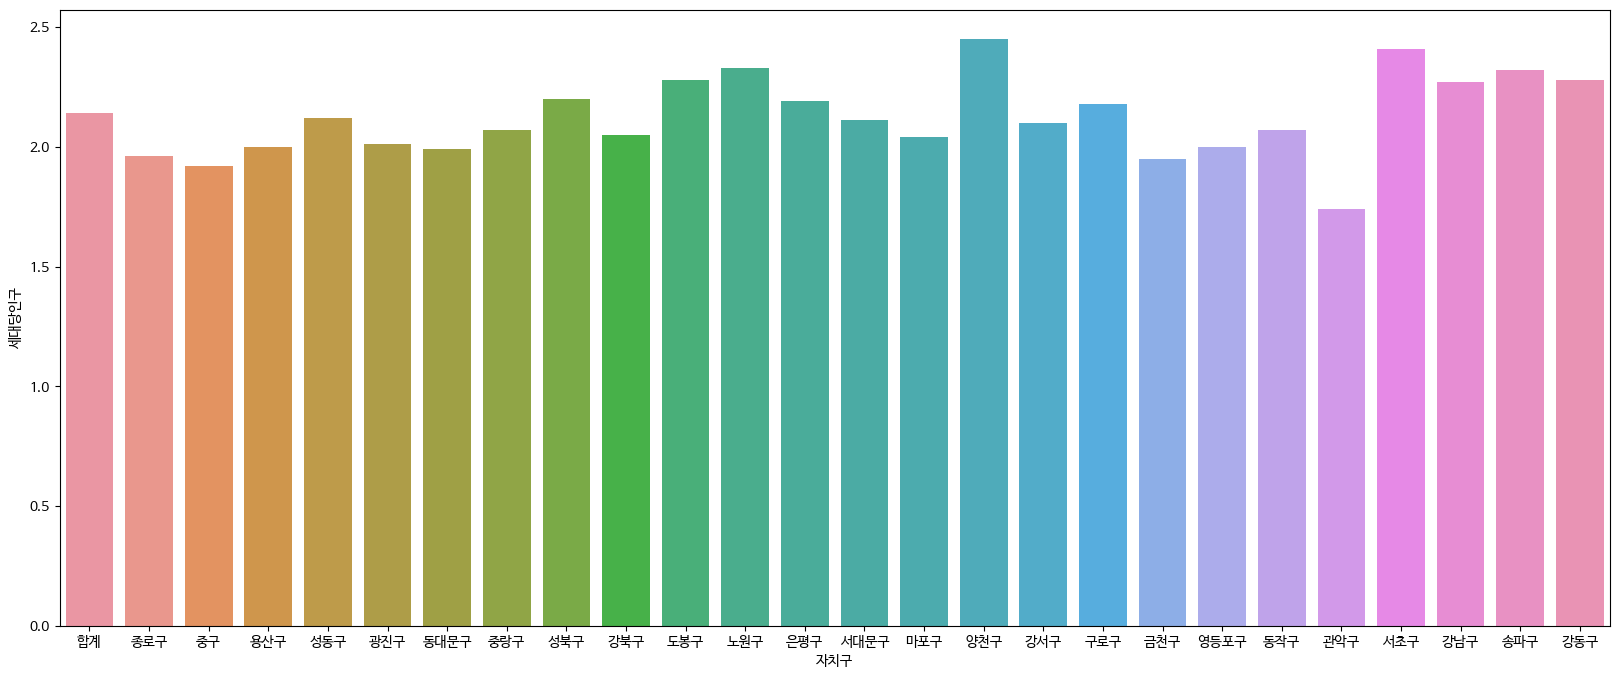

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='자치구', y='세대당인구', data=seoul_people)
plt.show()

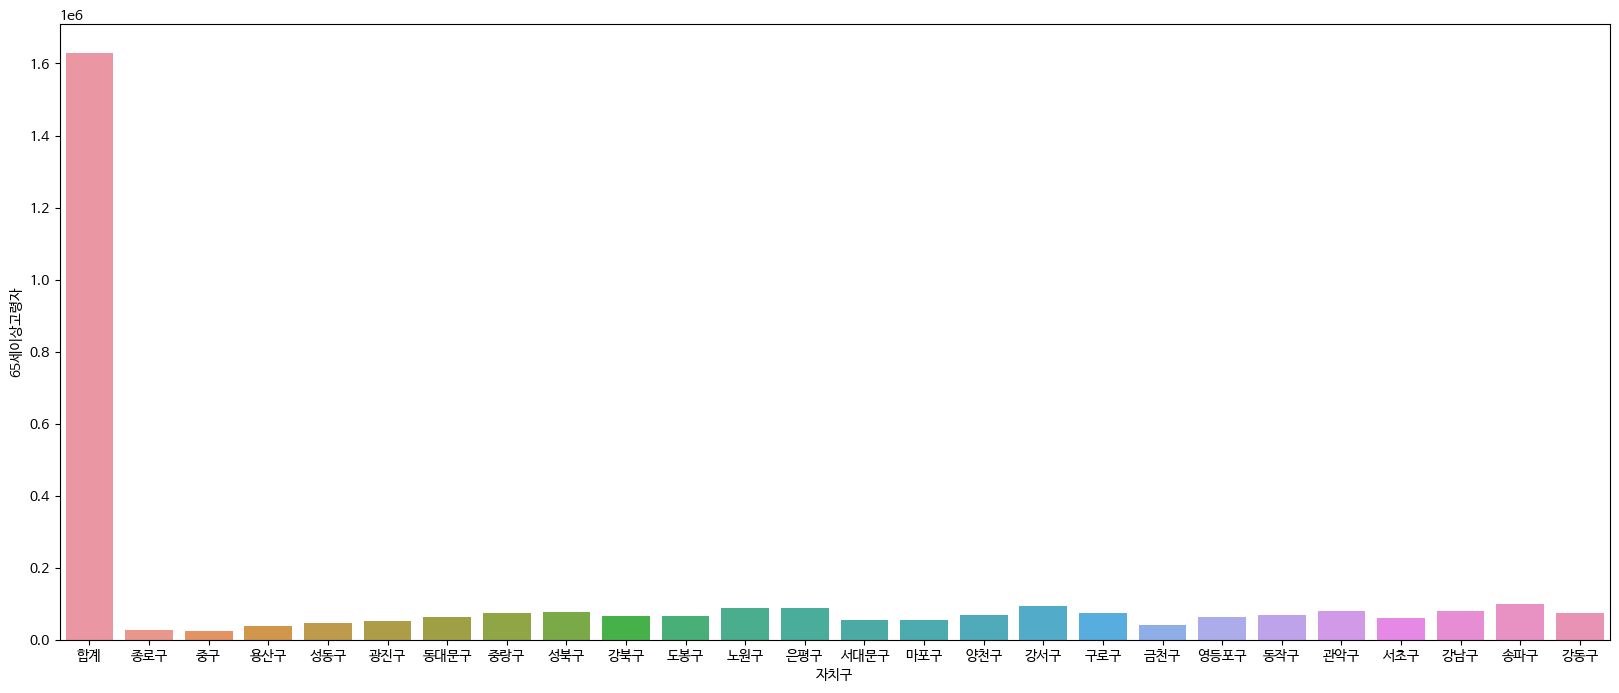

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='자치구', y='65세이상고령자', data=seoul_people)
plt.show()

1. 양천구, 서초구에 세대당인구가 많다
2. 종로구, 중구는 등록인구가 적다